<a href="https://colab.research.google.com/github/swastikbanerjee/ML_Lab/blob/main/2348566_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import threading
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore",category=FutureWarning)
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

In [115]:
data = pd.read_csv("/content/Groceries_dataset (1).csv")

In [116]:
data.shape

(38765, 3)

In [117]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [118]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [119]:
transactions=[]
for index,row in data.iterrows():
  transactions.append(row.dropna().tolist())
transactions[:10]

[[1808, '21-07-2015', 'tropical fruit'],
 [2552, '05-01-2015', 'whole milk'],
 [2300, '19-09-2015', 'pip fruit'],
 [1187, '12-12-2015', 'other vegetables'],
 [3037, '01-02-2015', 'whole milk'],
 [4941, '14-02-2015', 'rolls/buns'],
 [4501, '08-05-2015', 'other vegetables'],
 [3803, '23-12-2015', 'pot plants'],
 [2762, '20-03-2015', 'whole milk'],
 [4119, '12-02-2015', 'tropical fruit']]

In [120]:
chunk_size = 1000
num_chunks = len(transactions)

for i in range(num_chunks):
    chunk = transactions[i * chunk_size: (i + 1) * chunk_size]

    encoded = pd.get_dummies(pd.DataFrame(chunk).stack()).sum(level=0)
    transactionsdf = (encoded > 0).astype(int)

In [121]:
aprioricompleted = threading.Event()
fpcompleted = threading.Event()

In [122]:
executiontime = [0,0]

In [124]:
def runapriori():
    stime = time.time()
    global aprioriresults
    aprioriresults = apriori(transactionsdf, min_support=0.02, use_colnames=True)
    executiontime[0] = time.time() - stime
    aprioricompleted.set()

In [125]:
def runfp():
    stime = time.time()
    global fpresults
    fpresults = fpgrowth(transactionsdf, min_support=0.02, use_colnames=True)
    executiontime[1] = time.time() - stime
    fpcompleted.set()

In [126]:
apthread = threading.Thread(target=runapriori)
fpthread = threading.Thread(target=runfp)

In [127]:
apthread.start()
fpthread.start()
aprioricompleted.wait()
fpcompleted.wait()
apthread.join()
fpthread.join()

In [128]:
print(executiontime)

[0.004120349884033203, 0.00201416015625]


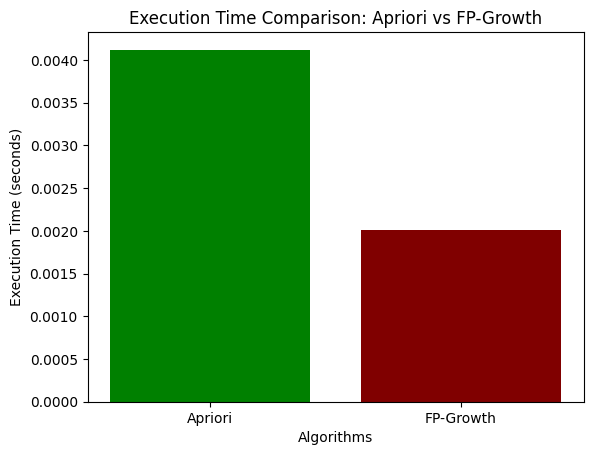

In [129]:
# Labels for the algorithms
algorithms = ['Apriori', 'FP-Growth']

# Create a bar graph
plt.bar(algorithms, executiontime, color=['green','maroon'])

# Label the axes and add a title
plt.xlabel('Algorithms')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison: Apriori vs FP-Growth')

# Display the graph
plt.show()

Since, FP-growth algorithm takes lesser execution time than Apriori algorithm for our Market Basket Analysis, it is recommended.

In [ ]:
min_support = float(input("Enter the minimum support threshold: "))
min_confidence = float(input("Enter the minimum confidence threshold: "))

apriori_rules = association_rules(aprioriresults, metric="confidence", min_threshold=min_confidence)
fp_rules = association_rules(fpresults, metric="confidence", min_threshold=min_confidence)

print("\nApriori Association Rules:")
print(apriori_rules)
print("\nFP-Growth Association Rules:")
print(fp_rules)